## Fuel Prices: Explorative Data Analysis

Historical Finnish Fuel Data.

Plots: **Seaborn, matplotlib**

## Import 

In [63]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### import preprocessed data

3 datasets:
- fulldataset
- diesel only
- gasoline only

In [ ]:
# gasoline data loading
data = pd.read_csv('data/full_data.csv', index_col='Date', parse_dates=True, encoding='latin1')
data

,Polttoneste,Hinta
Kuukausi,,
1988-01-01,"Moottoribensiini 95 E 10, snt/l",56.0
1988-01-01,"DieselÃ¶ljy, snt/l",40.0
1988-01-01,"Kevyt polttoÃ¶ljy, snt/l",16.0
1988-01-01,"Kevyt polttoÃ¶ljy, eur/MWh",16.1
1988-02-01,"Moottoribensiini 95 E 10, snt/l",56.0
...,...,...
2025-02-01,"Kevyt polttoÃ¶ljy, eur/MWh",132.4
2025-03-01,"Moottoribensiini 95 E 10, snt/l",179.0
2025-03-01,"DieselÃ¶ljy, snt/l",179.0


In [ ]:
# gasoline data loading
gasoline_data = pd.read_csv('data/gasoline_data.csv', index_col='Date', parse_dates=True, encoding='latin1')
gasoline_data.head(3)

,Hinta
Kuukausi,
1988-01-01,56.0
1988-02-01,56.0
1988-03-01,56.0


In [ ]:
# diesel data loading
diesel_data = pd.read_csv('data/diesel_data.csv', index_col='Date', parse_dates=True, encoding='latin1')
diesel_data.head(3)

,Hinta
Kuukausi,
1988-01-01,40.0
1988-02-01,40.0
1988-03-01,40.0


# Analysis
### Basic Plots

Line, Scatter, Box

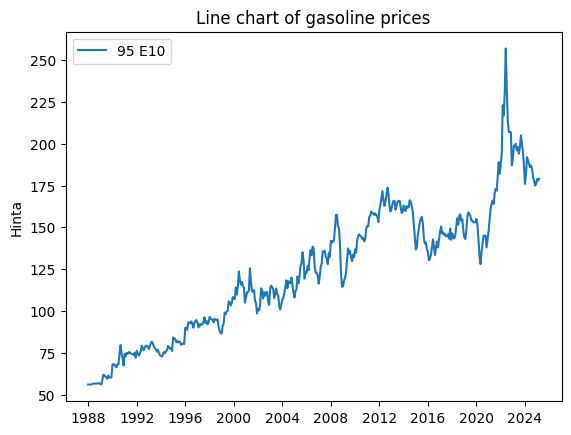

In [ ]:
sns.lineplot(x=gasoline_data.index.values, y="Price", data=gasoline_data, label='95 E10')
plt.title('Line chart of gasoline prices')
plt.show()

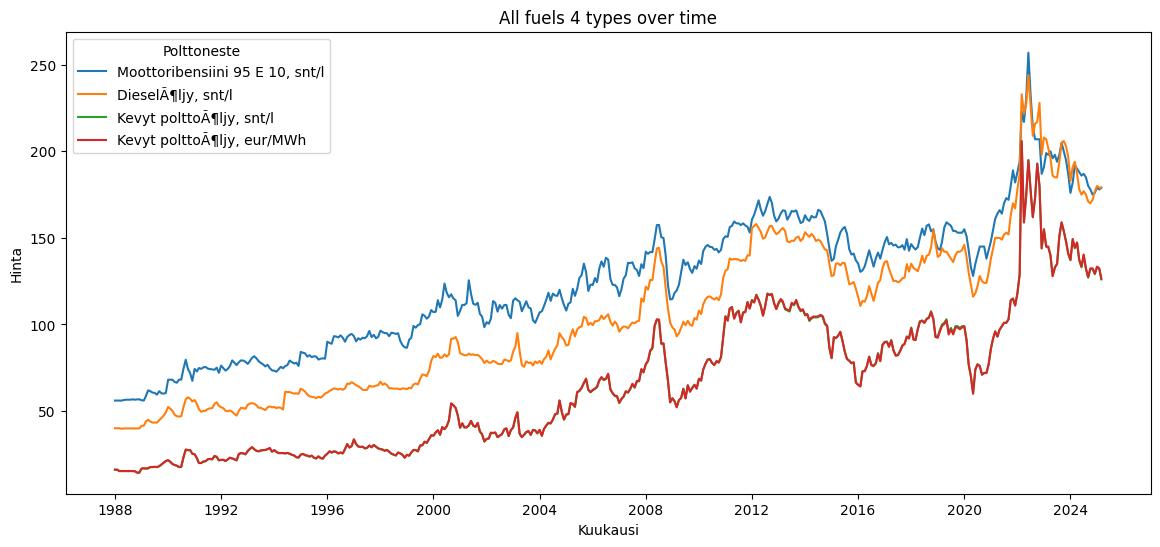

In [ ]:
# multi line plot with hue
plt.figure(figsize=(14,6))
sns.lineplot(x=data.index, y='Price', hue='Fuel Type', data=data)
plt.title("All fuels 4 types over time")
plt.show()

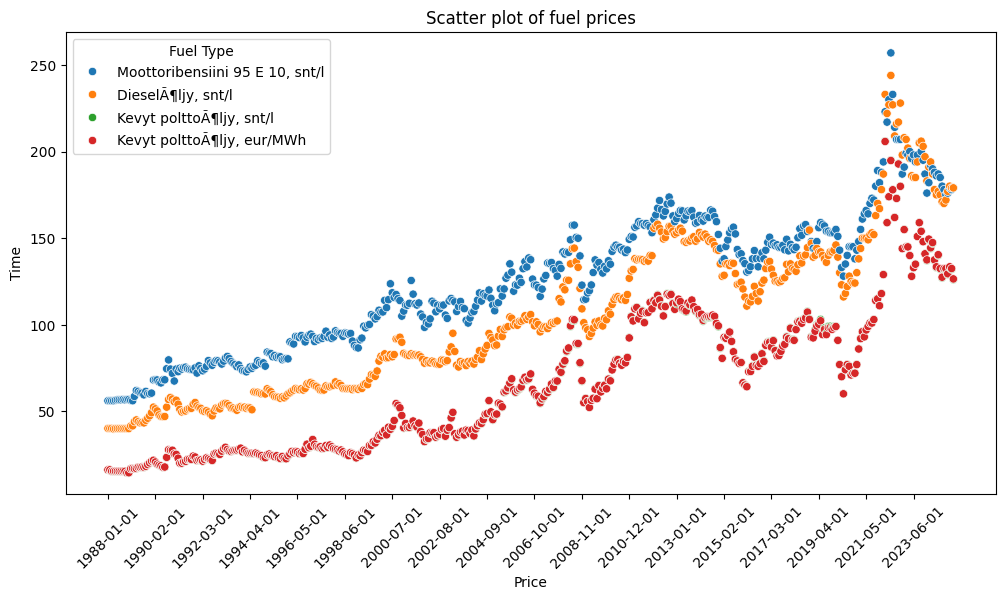

In [ ]:
# Scatter plot
plt.figure(figsize=(12, 6))  # width=12 inches, height=6 inches
# plot
sns.scatterplot(
    x=data.index.values, 
    y='Price', 
    hue='Fuel Type',  # different colors for each fuel
    data=data
)
# Show only every 10th tick on y-axis
ticks = data.index[::100]
plt.xticks(ticks, rotation=45)  # rotate 45 degrees
# labels and show plot
plt.xlabel("Price")
plt.ylabel("Time")
plt.title("Scatter plot of fuel prices")
plt.legend(title='Fuel Type')
plt.show()

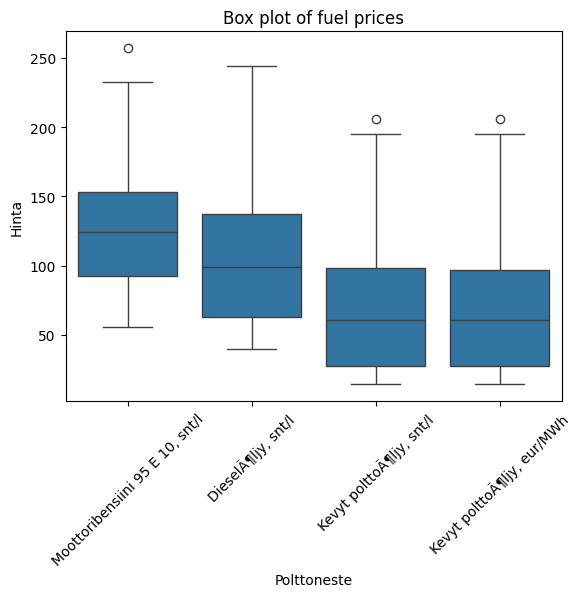

In [ ]:
# Box plot of all 4 fuel prices over time
sns.boxplot(x='Fuel Type', y='Price', data=data)
plt.xticks(rotation=45)  # Rotate x-axis labels 45 degrees
plt.title("Box plot of fuel prices")
plt.show()


### Advanced plot

In [ ]:
# 12-month rolling averages for each fuel type
# first copy the dataframes to avoid SettingWithCopyWarning
df_gas = gasoline_data.copy()
df_diesel = diesel_data.copy()

# Gasoline 95 E10 snt/l
df_gas['Rolling Price'] = df_gas['Price'].transform(lambda x: x.rolling(12, min_periods=1).mean())
# Diesel 10 snt/l
df_diesel['Rolling Price'] = df_diesel['Price'].transform(lambda x: x.rolling(12, min_periods=1).mean())

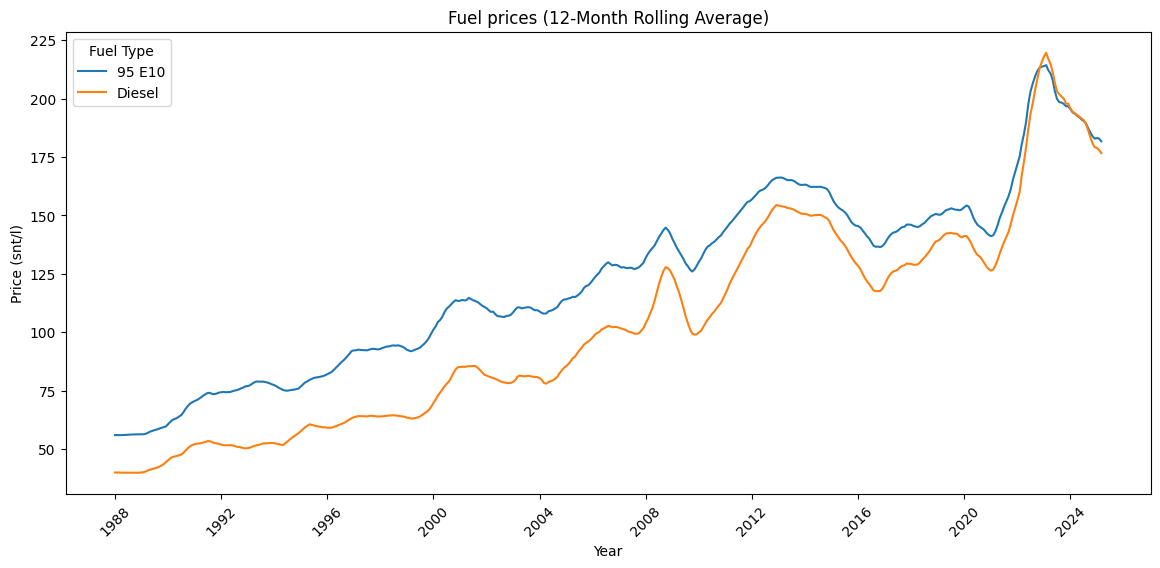

In [ ]:
# Plot rolling averages
plt.figure(figsize=(14,6))
sns.lineplot(x=df_gas.index, y='Rolling Price', data=df_gas, label='95 E10')
sns.lineplot(x=df_diesel.index, y='Rolling Price', data=df_diesel, label='Diesel')
plt.title("Fuel prices (12-Month Rolling Average)")
plt.xlabel("Year")
plt.ylabel("Price (snt/l)")
plt.xticks(rotation=45)
plt.legend(title='Fuel Type')
plt.show()

In [76]:
# filter last (2018->) gasoline and diesel
five_years_data = data[
    (data.index >= '01-01-2018') & # last 6+ years
    (data['Polttoneste'].isin(['Moottoribensiini 95 E 10, snt/l', 'Dieselöljy, snt/l'])) # only diesel and gasoline
    ].copy()

five_years_data

,Polttoneste,Hinta
Kuukausi,,
2018-01-01,"Moottoribensiini 95 E 10, snt/l",146.4
2018-02-01,"Moottoribensiini 95 E 10, snt/l",144.5
2018-03-01,"Moottoribensiini 95 E 10, snt/l",143.3
2018-04-01,"Moottoribensiini 95 E 10, snt/l",144.7
2018-05-01,"Moottoribensiini 95 E 10, snt/l",150.2
...,...,...
2024-11-01,"Moottoribensiini 95 E 10, snt/l",175.0
2024-12-01,"Moottoribensiini 95 E 10, snt/l",176.0
2025-01-01,"Moottoribensiini 95 E 10, snt/l",179.0


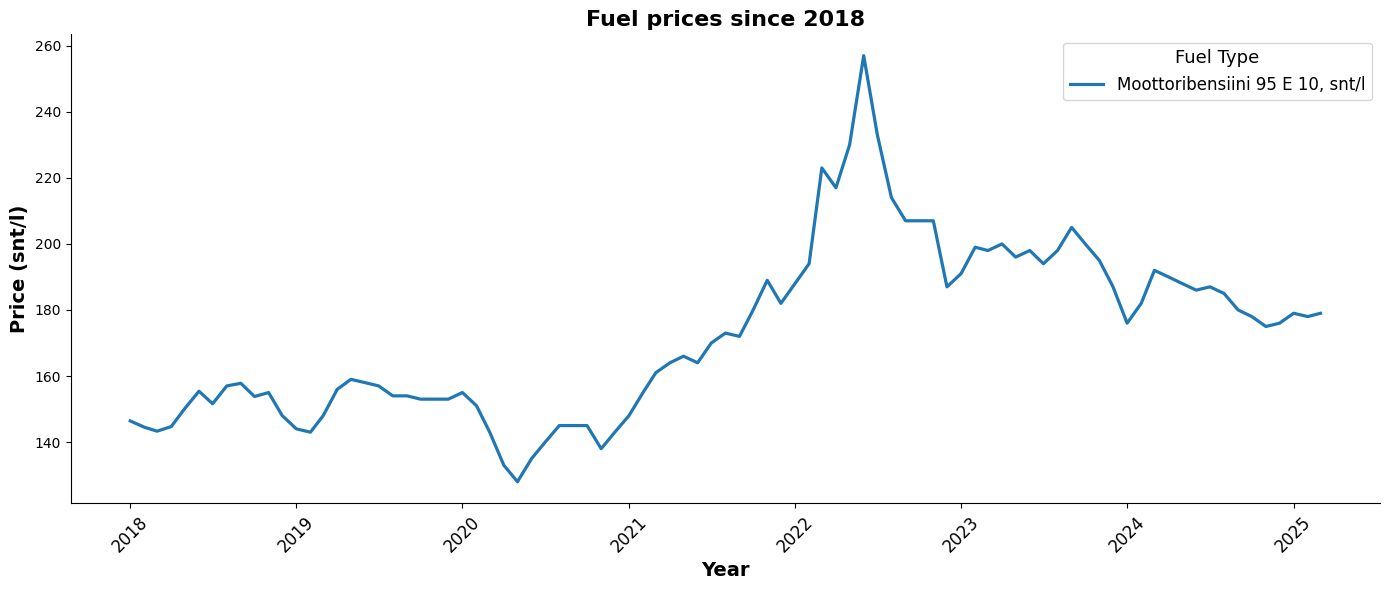

In [77]:
# multi line plot using hue
plt.figure(figsize=(14,6))
sns.lineplot(x=five_years_data.index, y='Hinta', hue='Polttoneste', data=five_years_data, linewidth=2.3)
# styling
sns.despine()
plt.title("Fuel prices since 2018", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=14, weight='bold')
plt.ylabel("Price (snt/l)", fontsize=14, weight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Fuel Type", fontsize=12, title_fontsize=13)
plt.tight_layout()

plt.show()

In [ ]:
# index base
five_years_data['indexed_price'] = (
    five_years_data.groupby('Polttoneste')['Hinta']
    .transform(lambda x: x / x.iloc[0] * 100) # divide by first index *100 for relative values
)

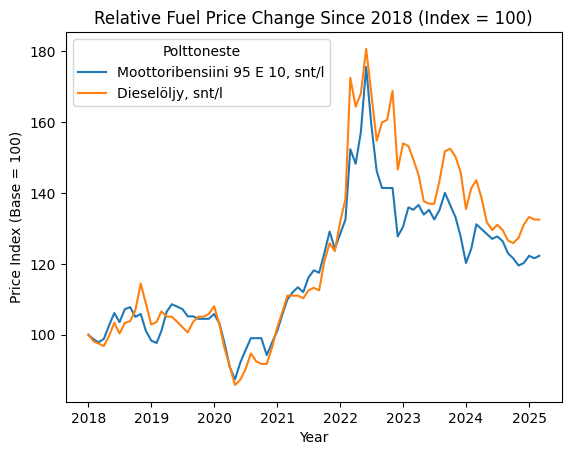

In [ ]:
# Plot 
sns.lineplot(data=five_years_data, x='Kuukausi', y='indexed_price', hue='Polttoneste')
plt.title('Relative Fuel Price Change Since 2018 (Index = 100)')
plt.ylabel('Price Index (Base = 100)')
plt.xlabel('Year')
plt.show()

<Axes: xlabel='Kuukausi'>

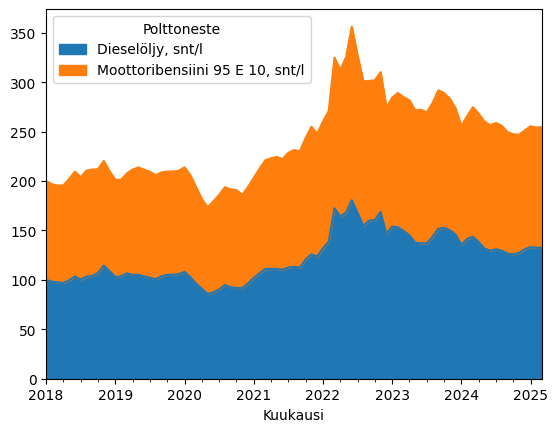

In [ ]:
# Temporarily reset index for pivot only
five_years_pivot = five_years_data.reset_index().pivot(
    index='Kuukausi',
    columns='Polttoneste',
    values='indexed_price'
)
five_years_pivot.plot.area()
